# Mid Term Project
by:
Srini and Denny

<a id='content'></a>
### Table of content
<a href='#setup'>setup libraries</a>
- pandas, numpy
- sklearn

<a href='#helper_function'>helper functions</a>
- plot data

<a href='#data_functions'>data functions</a>
- interquartile
- droping tables
- transformation

<a href='#raw_data'>raw data</a>
- loading raw data
<li>
    <a href='#plot_raw'>plot raw data</a>
    <li>
    <a href='#heatmap'>heatmap</a>
    </li>
</li>

<a href='#analyze_raw_data'>analyze Raw Data</a>

<a href='#plot_regression'>plot regression graph</a>


<a href='#content'>back to content list</a>
<a id='setup'></a> 
### Setup

In [49]:
# import libraries

# dealing with data libs
import pandas as pd
import numpy as np


# dealing with date 
import datetime

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm # progressbar for looping


# machine learning libs
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm





<a href='#content'>back to content list</a>
<a id='helper_function'></a> 
### Helper Functions

In [50]:
# ploting all numerical data from dataframe

def plot_numeric(data):
    for i in data._get_numeric_data():
        fig , ax = plt.subplots(1,2, figsize=(15,7))
        plt.title(i)
        sns.boxplot(x=data[i], ax=ax[0])
        sns.histplot(data[i], ax=ax[1])

        plt.show()

<a id='data_functions'></a>
<a href='#content'>back to content list</a>
### Functions for optional data handling:

#### option 1 Interquartile

In [51]:
# rip data in interquartile range

def reduce_to_interquartile(data: pd.DataFrame, name: list) -> pd.DataFrame:
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    filter = (data[name] >= Q1 - 1.5 * IQR) & (data[name] <= Q3 + 1.5 *IQR)
    data=data.loc[filter] 

    return data

#### option 2 remove

In [52]:
# remove column

def remove_column(data: pd.DataFrame, name: list) -> pd.DataFrame:
    data = data.drop(columns=name, inplace= True)

    return data

#### perform transformation operation on data

In [53]:
# transform operation

def aggregate_powertransform(data: pd.DataFrame, name: list, operation, lamda_value: float)-> pd.DataFrame:
    
    return data


<a id='raw_data'></a>
<a href='#content'>back to content list</a>
### load raw data

In [54]:
# load data and create work_copy

raw_data = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')

work_copy = raw_data.copy()


### Data review

In [55]:
raw_data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

<a id='plot_raw'></a>
<a href='#content'>back to content list</a>
### Plotting raw data

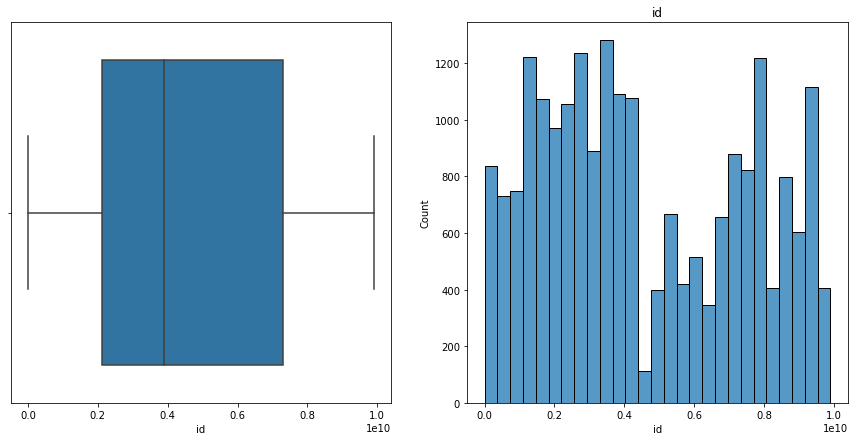

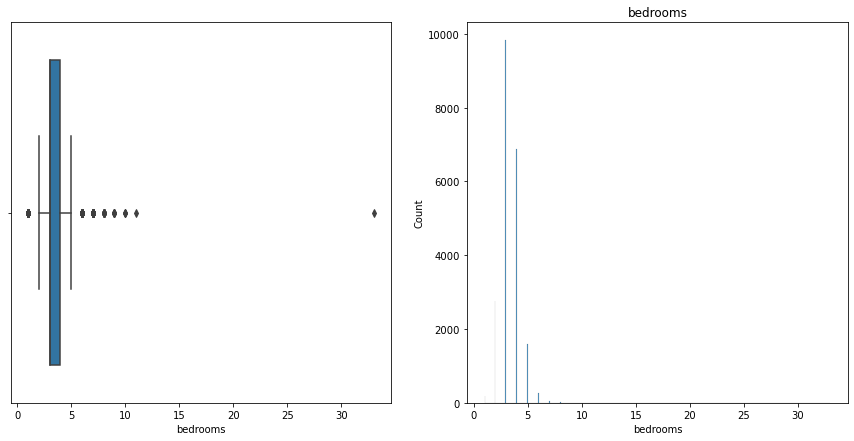

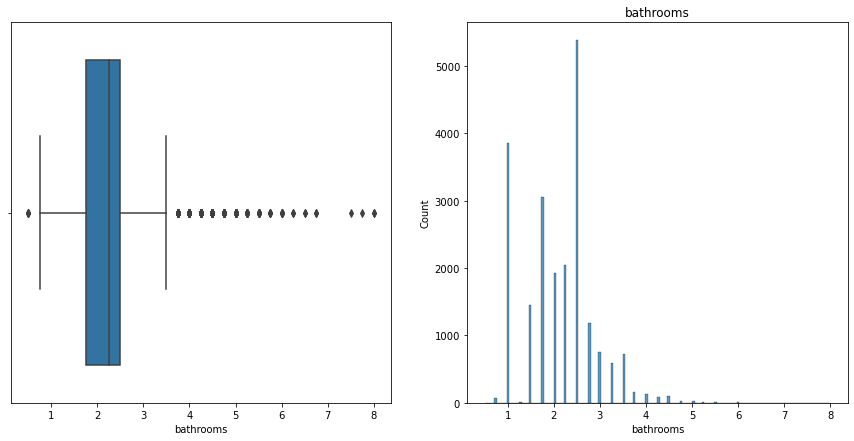

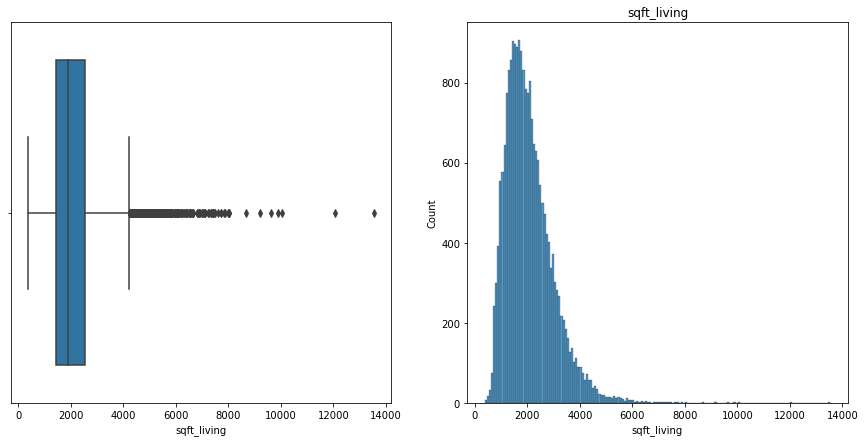

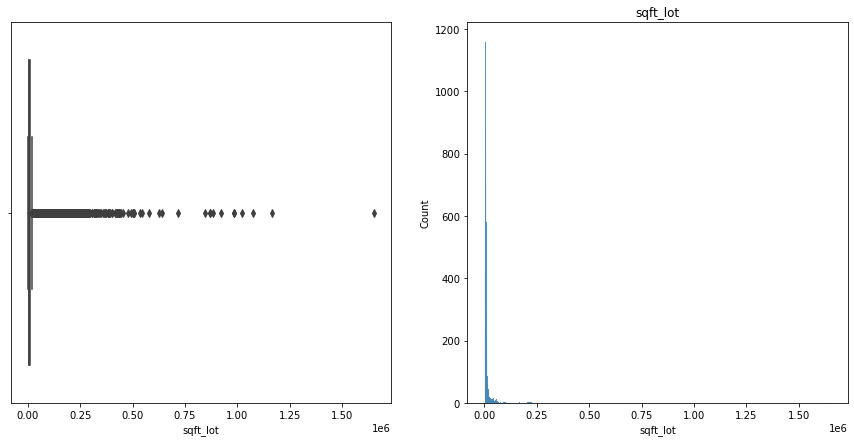

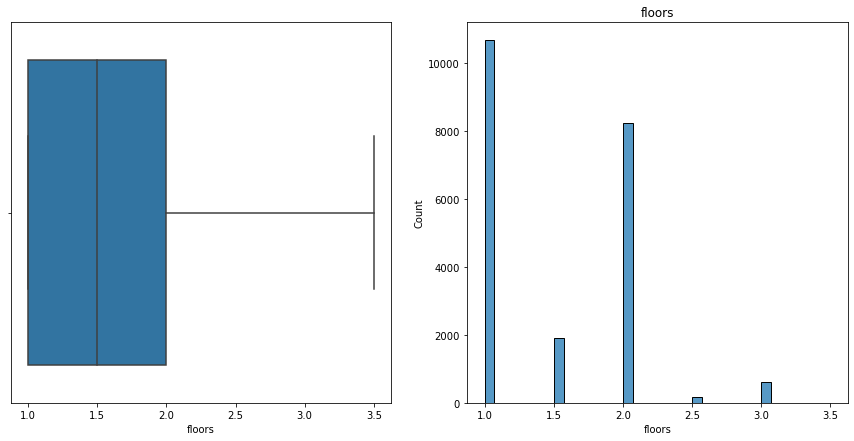

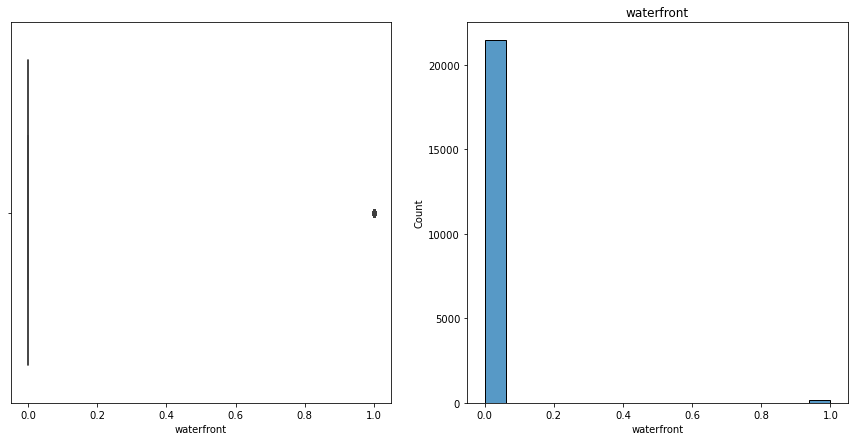

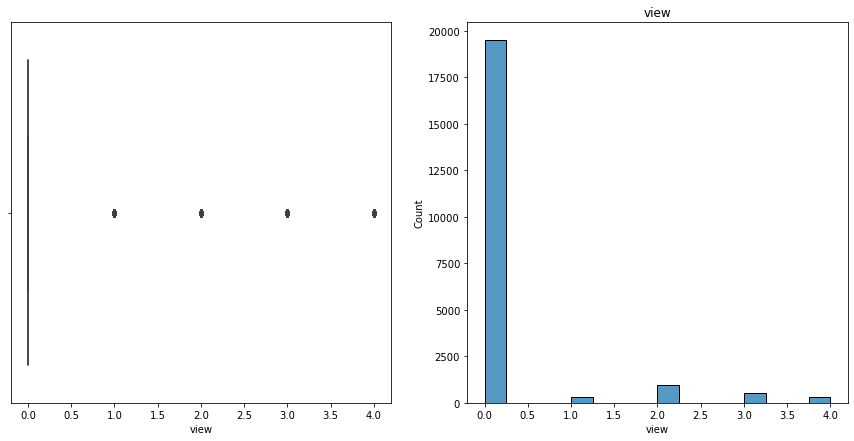

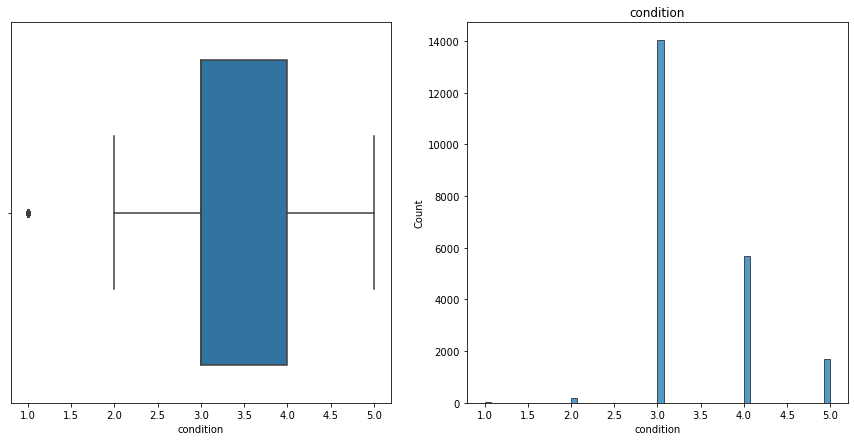

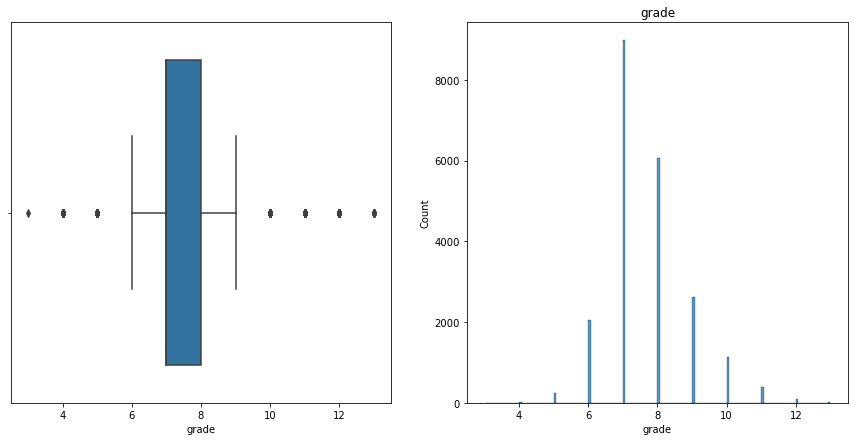

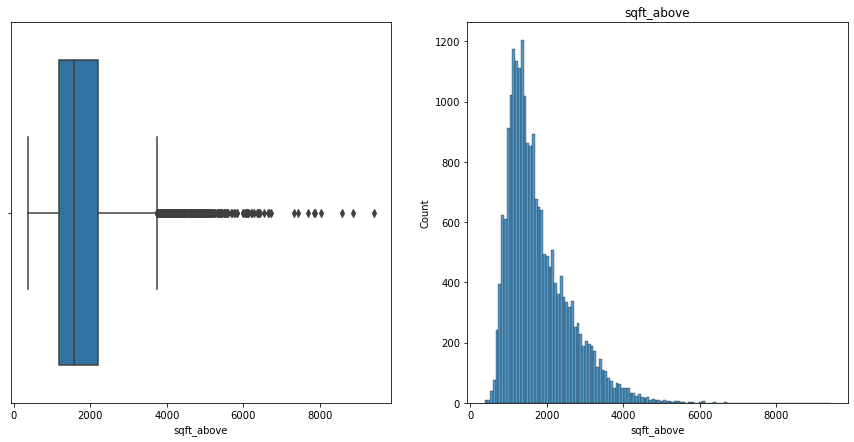

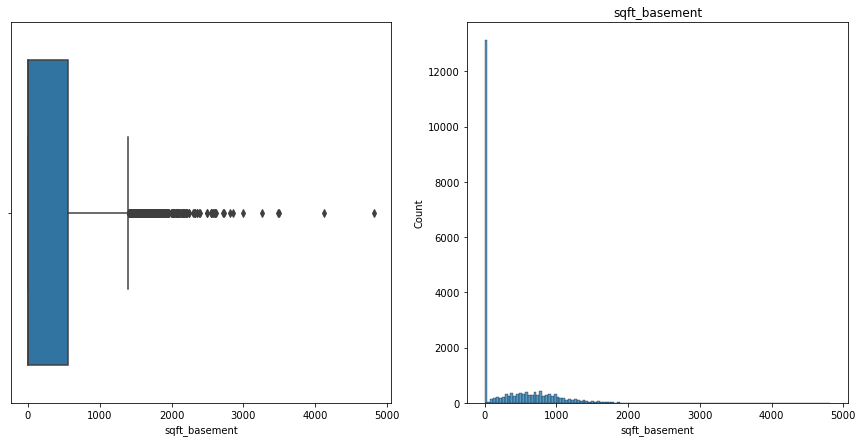

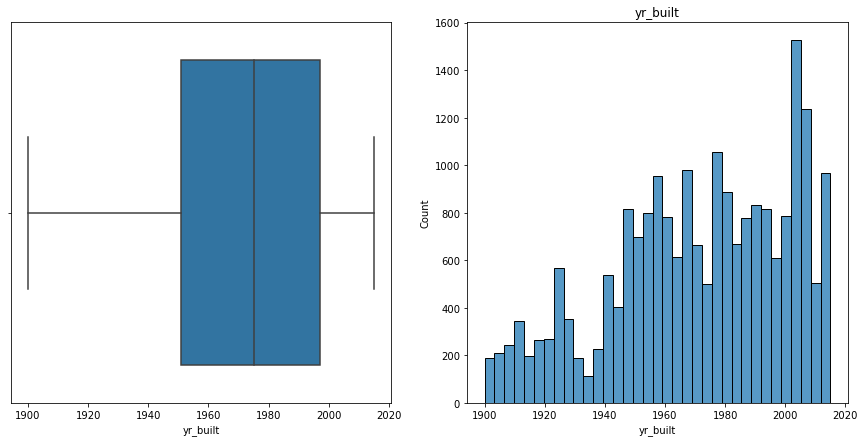

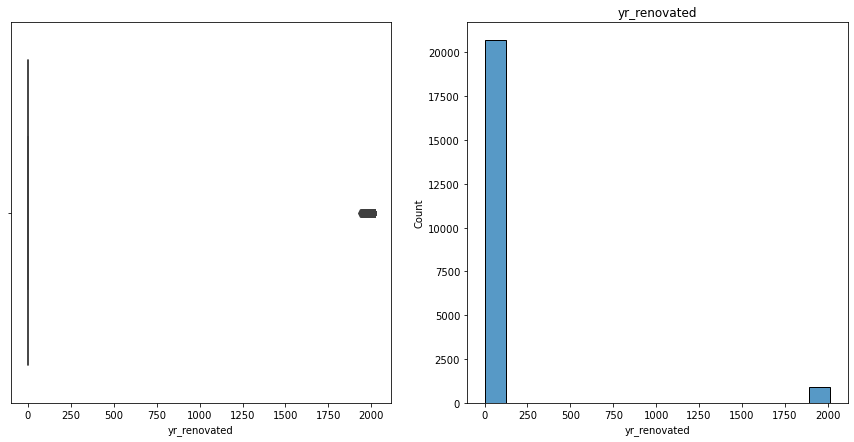

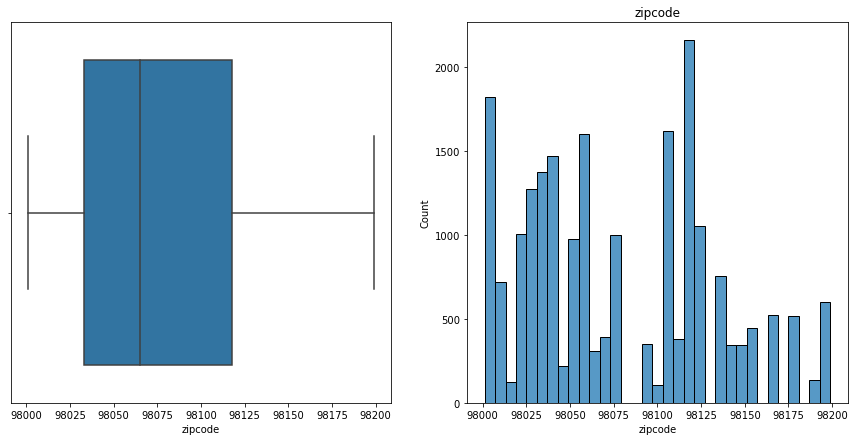

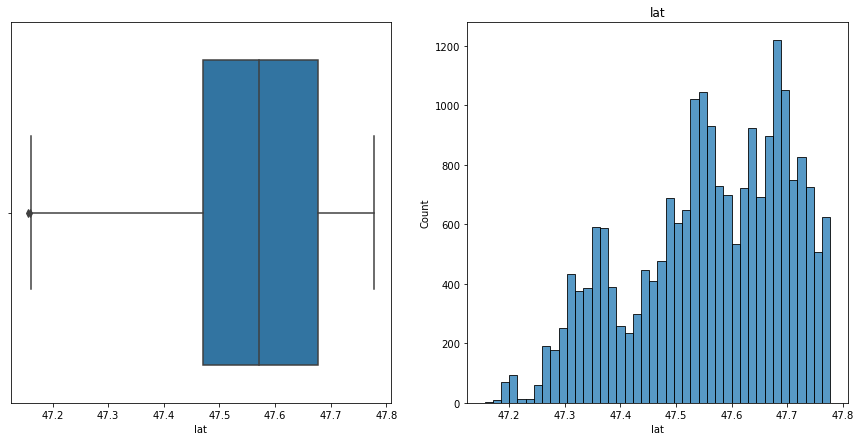

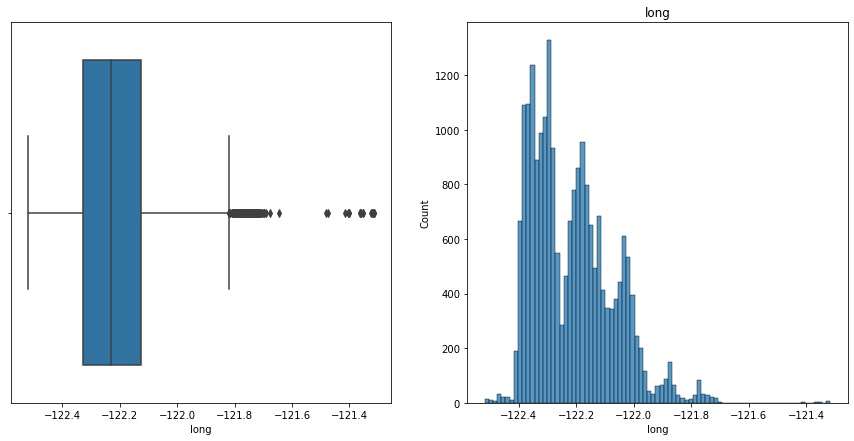

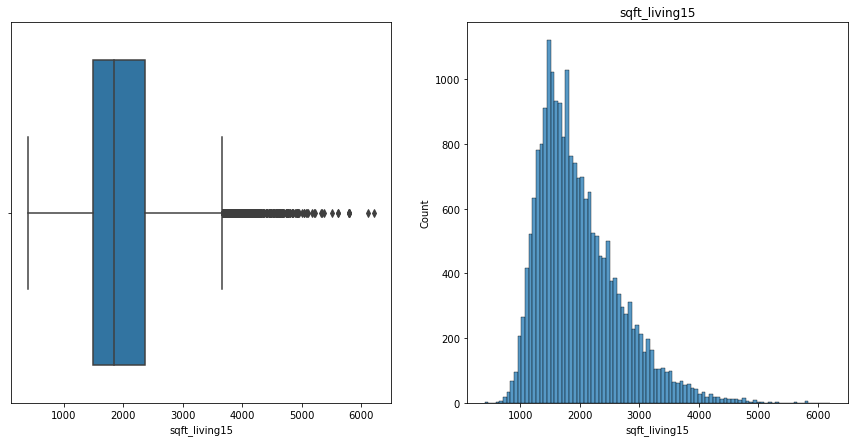

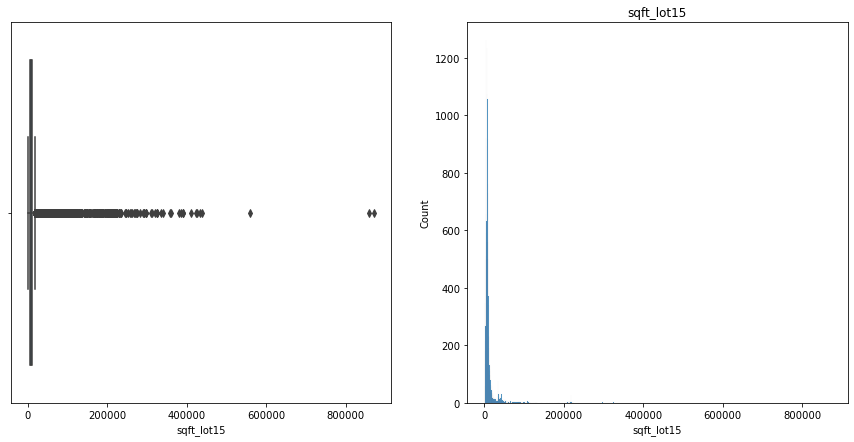

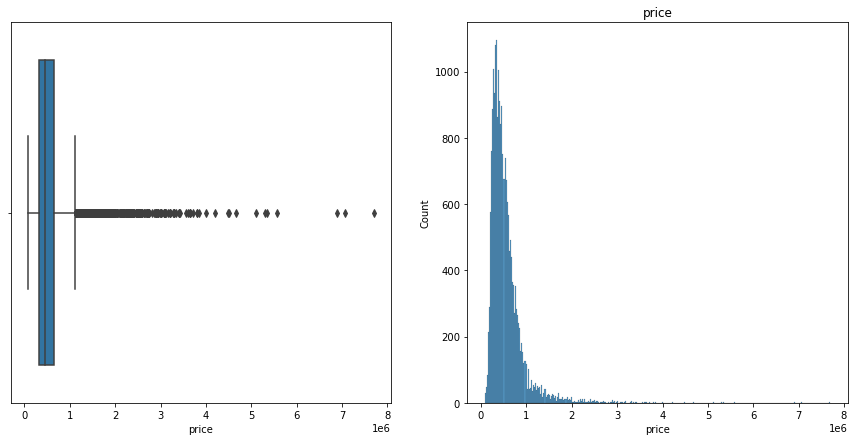

In [56]:
# analyze raw data
plot_numeric(work_copy)

<a id='heatmap'></a>
<a href='#content'>back to content list</a>

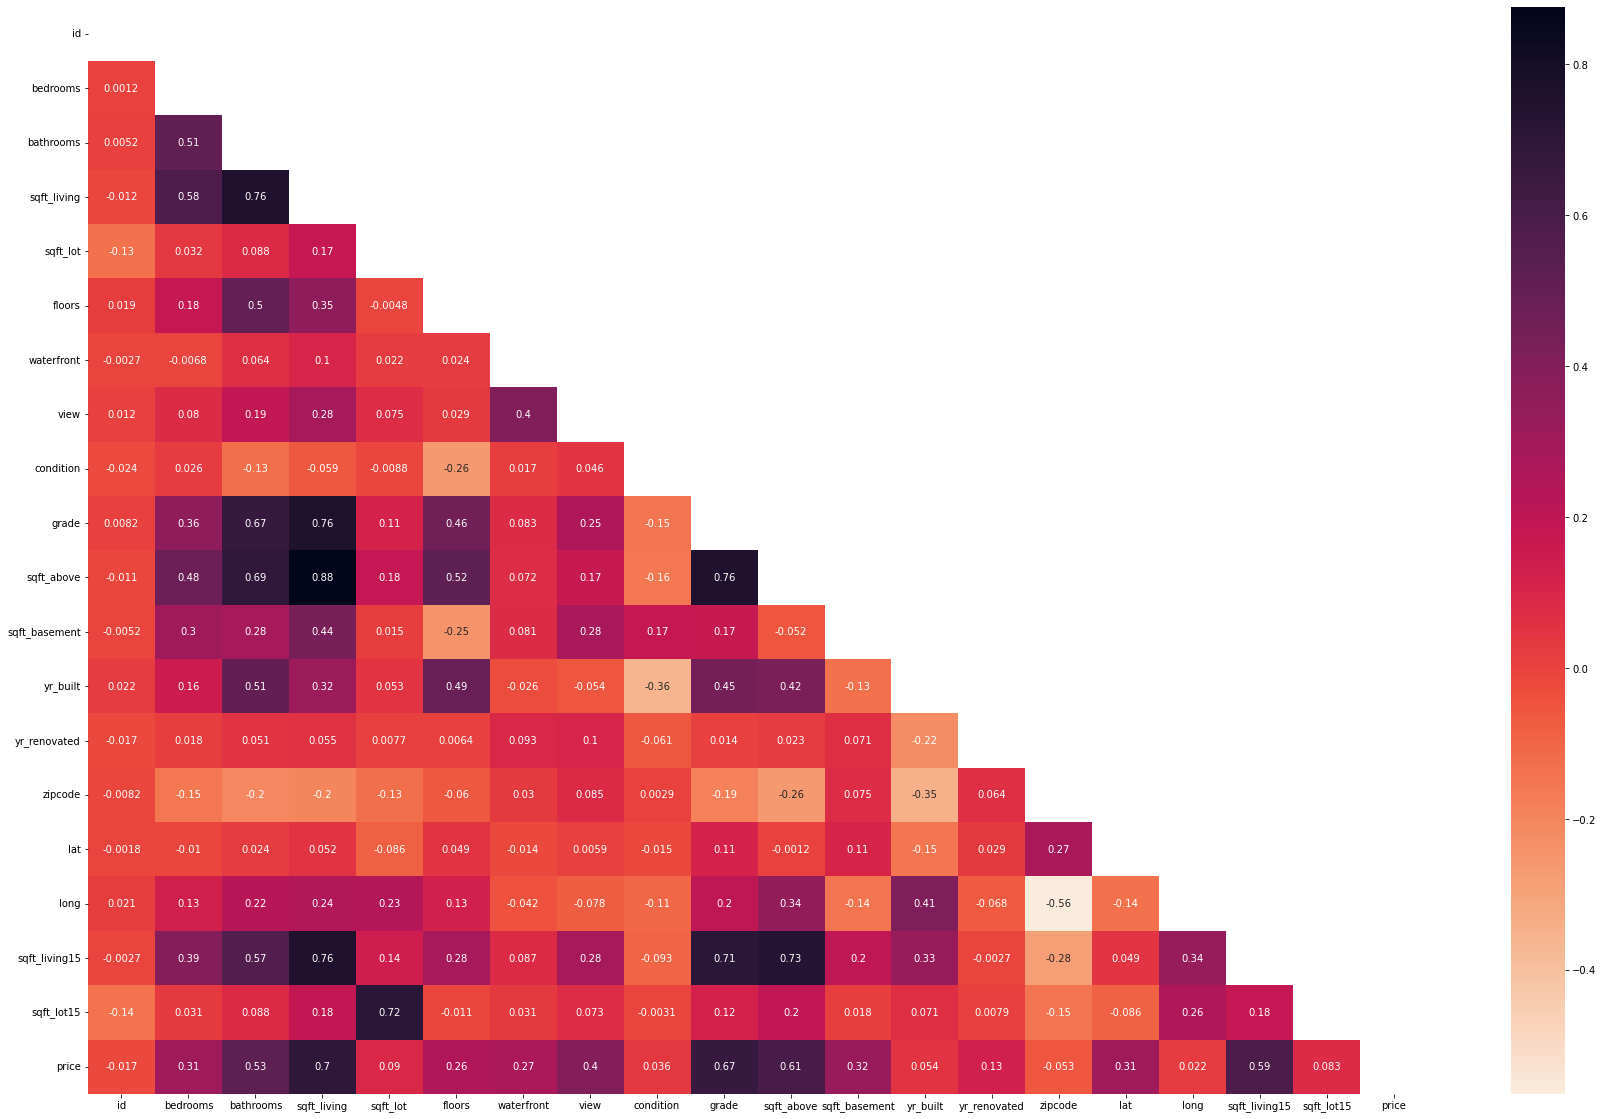

In [57]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(work_copy._get_numeric_data().corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(30, 20))
ax=sns.heatmap(work_copy._get_numeric_data().corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

<a id='analyze_raw_data'></a>
<a href='#content'>back to content list</a>
### **Data description:** 

> id -> will be removed as not mandatory
>
> bedrooms -> need adjustments as max 33 could be an outlayer, without -> normal distributed
>
> bathrooms -> max 8 needs to check, if its fits with connected sqft range ->
>
> sqft_living -> maybe recalculated in square meter to fit better in european perspective
>
> sqft_lot -> similar to sqft_living
>
> floors -> maybe changable to ordonal categorical
>
> waterfront -> set to categorical 
>
> view -> needs review why min to 75% is zero with an max of 4
>
> condition -> transform to ordonal categorical 0-5
>
> grade -> as descripted typical ordonal categorical 0-13
>
> sqft_above -> similar to sqft_living
>
> sqft_basement -> similar to sqft_living
> - as sqft_basement looks without zero numbers as normal distributed
> - ***ToDo:*** drop zero values from this column
> - create category 'has_basement'
> - fill all 'has_basement' where basement is included
>
> yr_build -> use as number or could be ordonal category when binning with steps e.g 5 years 1900-1905 ....
>
> zip code, lat and long -> skipt or could binning or clustered to regions 
>
> sqft_living15 and sqft_lot15 represents the average living and lot sqft of the closest 15 neiboorhouses





In [58]:
# drop first not need data
work_copy.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'], inplace=True)
#work_copy.drop(columns='sqft_above', inplace=True)
#work_copy.drop(columns=['id', 'date', 'sqft_lot', 'floors', 'waterfront', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15'], inplace=True)

In [59]:
work_copy.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,7.700000e+06


### First Approach with unfilterd data

In [60]:
#work_copy =  work_copy[work_copy['bedrooms'] != 33]

In [61]:
label = work_copy['price']
work_copy.drop(columns='price', inplace=True)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(work_copy, label, test_size= 0.2, random_state= 42)

In [63]:
x_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,17277.000000,17277.00000,17277.000000,1.727700e+04,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000
mean,3.374891,2.11456,2083.498293,1.498963e+04,1.494993,0.007640,0.232737,3.410719,7.657753,1790.337211,293.161081,1970.965272,83.762864,1987.315796,12792.822191
std,0.904403,0.76768,917.551017,4.019803e+04,0.540944,0.087076,0.766845,0.650820,1.168816,825.994285,443.665758,29.356210,400.252312,683.416353,27026.880214
min,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.000000,1.75000,1430.000000,5.060000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000
50%,3.000000,2.25000,1920.000000,7.609000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,570.000000,1997.000000,0.000000,2360.000000,10089.000000
max,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [64]:
scaler_train = StandardScaler().fit(x_train)

scaler_train.transform(x_train)
scaler_train.transform(x_test)


array([[-0.41452996, -1.77756177, -1.34437646, ..., -0.20928121,
        -1.66421056, -0.16320603],
       [-0.41452996, -1.45189599, -0.62504959, ..., -0.20928121,
        -0.69844628, -0.26199943],
       [ 0.69120327,  0.17643293, -0.31988062, ..., -0.20928121,
         0.10635729,  1.38019102],
       ...,
       [ 1.7969365 , -0.14923285,  0.03978282, ..., -0.20928121,
         0.19415404,  5.34040014],
       [-0.41452996,  0.50209871, -0.10190278, ..., -0.20928121,
        -0.12776739, -0.2087176 ],
       [ 0.69120327, -0.14923285, -0.53785846, ..., -0.20928121,
        -0.87403979, -0.43849549]])

In [65]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test)

In [67]:
x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(list(y_train), x_train).fit()

print_model = model.summary()
print_model

/opt/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2379.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:47:55   Log-Likelihood:            -2.3670e+05
No. Observations:               17277   AIC:                         4.734e+05
Df Residuals:                   17262   BIC:                         4.735e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.31e+06   1.54e+05     40.875      0.000    6.01e+06    6.61e+06
bedrooms      -4.325e+04   2360.769    -18.321      0.000   -4.79e+04   -3.86e+04
bathrooms      4.847e+04   3937.468     12.311      0.000    4.08e+04    5.62e+04
sqft_living     109.7231      2.759     39.765      0.000     104.315     115.132
sqft_lot         -0.0251      0.058     -0.431      0.666      -0.139       0.089
floors         2.932e+04   4224.879      6.941      0.000     2.1e+04    3.76e+04
waterfront     5.723e+05   2.07e+04     27.644      0.000    5.32e+05    6.13e+05
view           4.237e+04   2540.527     16.679      0.000    3.74e+04    4.74e+04
condition      2.092e+04   2787.774      7.505      0.000    1.55e+04    2.64e+04
grade          1.214e+05   2524.433     48.107      0.000    1.16e+05    1.26e+05
sqft_above       49.2566      2.648     18.599      0.000      44.066      54.448
sqft_basement    60.4665      3.115     19.410      0.000      54.360      66.573
yr_built      -3636.9648     79.095    -45.982      0.000   -3791.998   -3481.931
yr_renovated      8.9872      4.382      2.051      0.040       0.398      17.576
sqft_living15    28.6130      4.055      7.056      0.000      20.665      36.561
sqft_lot15       -0.6090      0.087     -6.978      0.000      -0.780      -0.438
==============================================================================
Omnibus:                    13083.278   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           929142.506
Skew:                           3.048   Prob(JB):                         0.00
Kurtosis:                      38.405   Cond. No.                     5.80e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
type(work_copy._get_numeric_data())

pandas.core.frame.DataFrame

<a id='plot_regression'></a>
<a href='#content'>back to content list</a>
### Plot Regression Graph

In [69]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

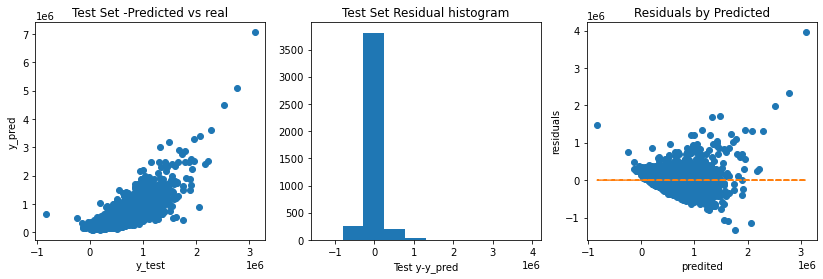

In [70]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

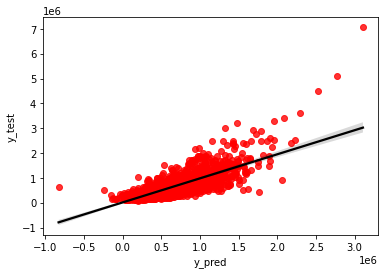

In [71]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})